MENCARI NILAI K TERBAIK PADA KNN
--------------------------------


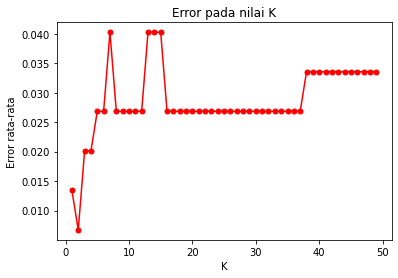

Nilai K terbaik adalah 2

 KLASIFIKASI DENGAN METODE KNN (K=2)
----------------------------------

 Hasil confussion matrix dengan KNN
[[108   1]
 [  0  40]]

 Hasil classification report dengan KNN
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       109
           1       0.98      1.00      0.99        40

    accuracy                           0.99       149
   macro avg       0.99      1.00      0.99       149
weighted avg       0.99      0.99      0.99       149


 Hasil classification report dengan KNN  + K-fold cross validation
0.9842696629213481


In [ ]:
import pandas as pd
import csv
import numpy as np
from matplotlib import pyplot as plt
from urllib.request import urlopen, Request
import requests
from bs4 import BeautifulSoup as bs 
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

class pokemon:
  def __init__(self):
    pass

  def scrapping(self):
   #pengambilan data dari situs web
    alamat = "https://pokemondb.net/pokedex/all"
    safeAdd = Request(alamat, headers={'User-Agent': 'Mozilla/5.0'})
    html = urlopen(safeAdd)
    data = bs(html, 'html.parser')
    table = data.find("table", {"id":"pokedex"})
    rows = data.findAll("tr")

    #mengambil sampai index ke-500
    row_data = []
    for row in rows:
        cell_data = []
        if row.contents[1].get_text() == "501": #stop function
            break

        for item in row.findAll(["th","td"]): #gathering function
            cell_data.append(item.get_text())
        row_data.append(cell_data)

    #memasukkan ke dataframe
    df = pd.DataFrame(row_data)
    df.columns = df.iloc[0]
    df = df[1:]

    #memasukan data ke dalam CSV
    df.to_csv('data_pokemon.csv',index=False)
  
  def kmeans(self):
    #membaca data CSV
    data = pd.read_csv("data_pokemon.csv") 

    #convert to numeric
    data["Attack"] = pd.to_numeric(data["Attack"])
    data["Defense"] = pd.to_numeric(data["Defense"])

    #menambahkan dua kolom tranformasi
    data["Alog"] = np.log(data["Attack"])
    data["Dlog"] = np.log(data["Defense"])

    #mengambil data pada dua kolom transformasi 
    log_data = data.iloc[:, 10:12]
    log_array = np.array(log_data)

    #klustering
    kmeans = KMeans(n_clusters=2, random_state=200)
    kmeans.fit(log_array)
    data['kluster'] = kmeans.labels_

    #memasukkan data kluster ke CSV
    data.to_csv('data_kluster.csv',index=False)

  def knn_learn(self):
    #membaca data kluster CSV
    knn_data = pd.read_csv("data_kluster.csv")
    #mengambil 2 atribut yang diperlukan
    set_data = knn_data.iloc [:, 10:12]
    kluster_data = knn_data.iloc [:,12] 
    #persiapan data untuk training 
    x_train, x_test, y_train, y_test = train_test_split(set_data, kluster_data, test_size=0.25,random_state=150) # 75% training and 25% test

    #mencari nilai K terbaik
    print('MENCARI NILAI K TERBAIK PADA KNN')
    print('--------------------------------')
    error = []
    for i in range(1, 50):
      model_k = KNeighborsClassifier(n_neighbors=i)
      model_k.fit(x_train, y_train)
      y_pred = model_k.predict(x_test)
      error.append(np.mean(y_pred != y_test))

    plt.figure(1)  
    plt.plot(range(1, 50), error, color='red', marker='o', markersize=5)
    plt.title('Error pada nilai K')  
    plt.xlabel('K')  
    plt.ylabel('Error rata-rata')
    plt.show()
    print ('Nilai K terbaik adalah 2')
 
    #menerapkan KNN model dengan k=2
    print('\n KLASIFIKASI DENGAN METODE KNN (K=2)')
    print('----------------------------------')
    model_k = KNeighborsClassifier(n_neighbors=2)
    #model belajar
    model_k.fit(x_train, y_train)
    #test model
    y_pred = model_k.predict(x_test)
    #evaluasi
    print('\n Hasil confussion matrix dengan KNN') 
    print(confusion_matrix(y_test, y_pred))
    print('\n Hasil classification report dengan KNN')
    print(classification_report(y_test, y_pred))

  def knn_cv(self):
    #membaca data kluster CSV
    knn_data = pd.read_csv("data_kluster.csv")
    #mengambil 2 atribut yang diperlukan
    set_data = knn_data.iloc [:, 10:12]
    kluster_data = knn_data.iloc [:,12] 
    #persiapan data untuk training 
    x_train, x_test, y_train, y_test = train_test_split(set_data, kluster_data, test_size=0.25,random_state=150) # 75% training and 25% test

    knn= KNeighborsClassifier(n_neighbors=2)
    score= cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy') 
    print('\n Hasil classification report dengan KNN  + K-fold cross validation')       
    print(score.mean())    

live = pokemon()
live.scrapping()
live.kmeans()
live.knn_learn()
live.knn_cv()